In [1]:
!date
!pwd

Чтв Дек 29 15:17:18 MSK 2016
/home/sphere/Analysis/007SelectEAS/ML


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from tqdm import tqdm
import math as mt
import numpy as np

In [32]:
# чтение данных обработки экспериментальных событий как сигнала
rsignal = pd.read_csv('Result-Signal', index_col=0, sep='\s+')
# количество событий
print('events:', len(rsignal))
rsignal[:4]

events: 1911


,SNRatio,AbsSignal,TotalNoise,NNear3,Theta,dt2,ng
nev,,,,,,,
10675,107.211700,381.888,3.562,31,0.204204,0.766965,34
10677,13.492210,719.364,53.317,51,0.486947,1.157275,56
10679,0.101800,61.124,600.431,9,1.193805,2.939874,14
10681,0.014809,379.171,25603.580,39,1.162389,2.477168,44


In [33]:
# чтение данных обработки экспериментальных событий как шума
rnoise = pd.read_csv('Result-Noise', index_col=0, sep='\s+')
print('events:', len(rnoise))
rnoise[:4]

events: 1911


,SNRatio,AbsSignal,TotalNoise,dt2,ng
nev,,,,,
10675,37.680380,375.485,9.965,1.802776,32
10677,0.497918,249.740,501.569,1.519109,13
10679,0.077615,218.918,2820.565,1.058301,25
10681,0.009828,397.253,40419.650,1.505545,45


In [120]:
# слияние массивов
#all=rsignal.join(rnoise, suffixes=('_s','_n'))
all=pd.merge(rsignal,rnoise,  suffixes=('_s','_n'), left_index=True, right_index=True, how='outer')
print(len(all))
all[:3]

1911


,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25


In [93]:
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
len(param)

12

In [128]:
# посмотрим кадры с большой суммой сигнала
all[:][all['AbsSignal_s'] > 10000]

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
11588,207.34480,10232.47,49.350,87,0.424115,1.105542,90,0.394112,2696.952,6843.118,1.390444,15
13930,7.01154,21667.94,3090.326,107,1.319469,1.737438,107,0.126427,2159.759,17083.060,2.202272,20
14202,118.79880,11754.54,98.945,107,0.486947,0.927261,107,0.271037,2449.132,9036.137,2.276361,11


In [126]:
# Выбросим кадр 11048: в нем суммарный сигнал очень большой (дверь)
all = all[:][all['AbsSignal_s'] < 100000]
print(len(all))
all[:3]

1910


,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25


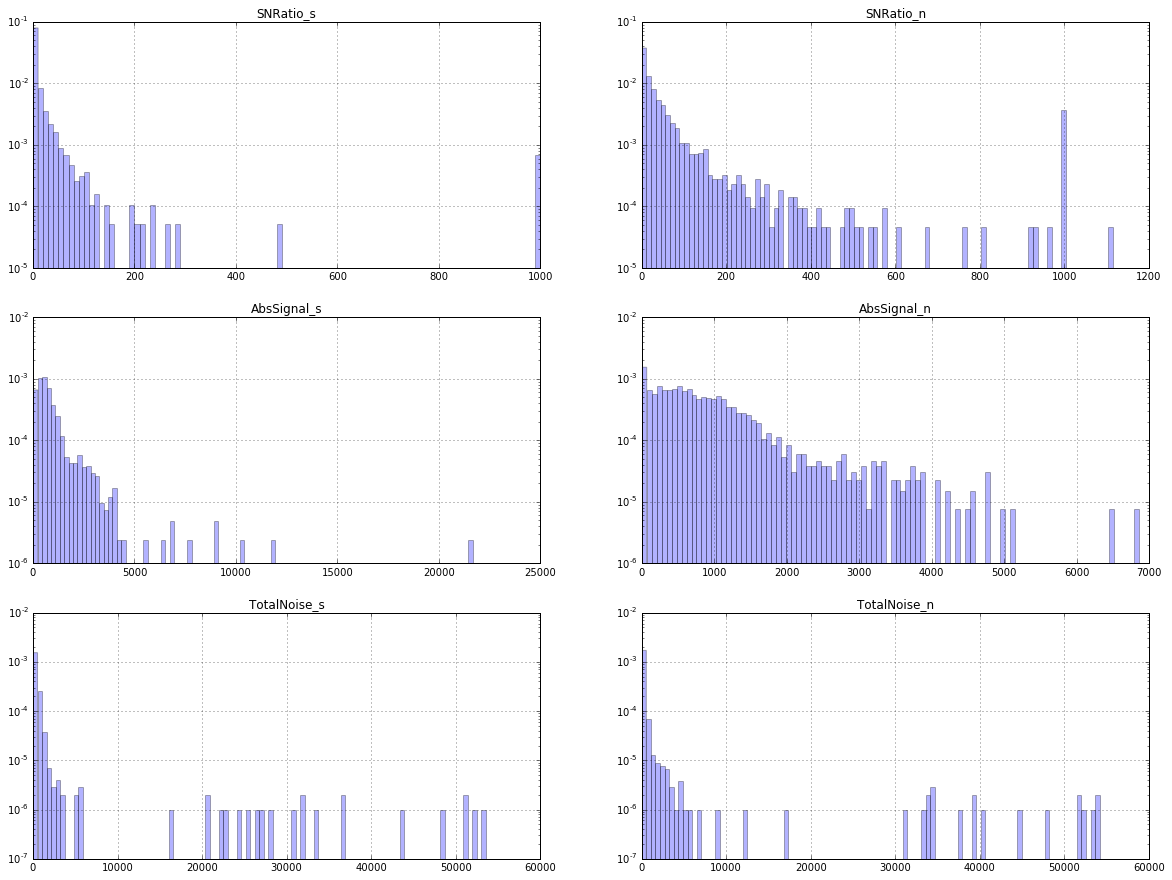

In [123]:
plt.figure(figsize=(20,15))
plt.figure(1)
for i in range(len(param)//2):
    plt.subplot(321+i)
    plt.hist(all[param[i]], bins = 100, alpha = 0.3, color = 'b', normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

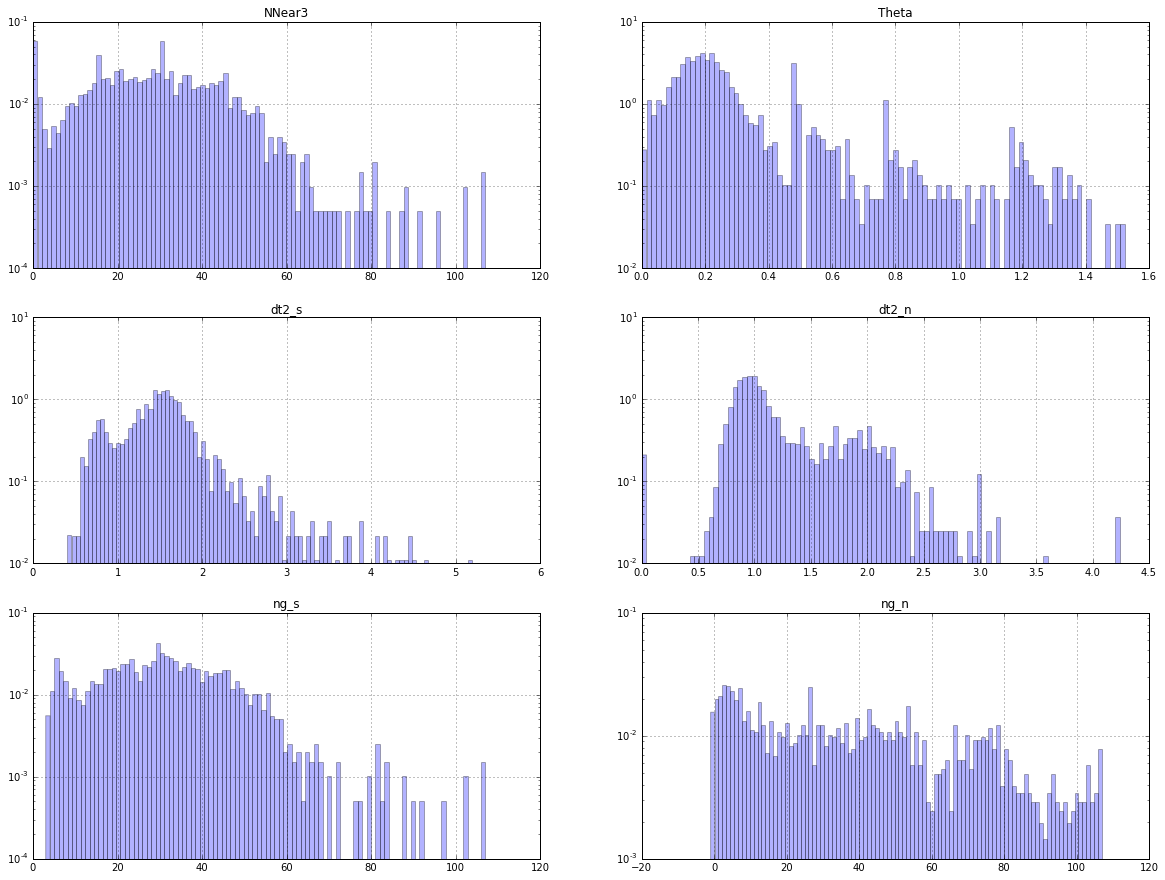

In [124]:
plt.figure(figsize=(20,15))
plt.figure(1)
for i in range(len(param)//2 , len(param)):
    plt.subplot(321+i-6)
    plt.hist(all[param[i]], bins = 100, alpha = 0.3, color = 'b', normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

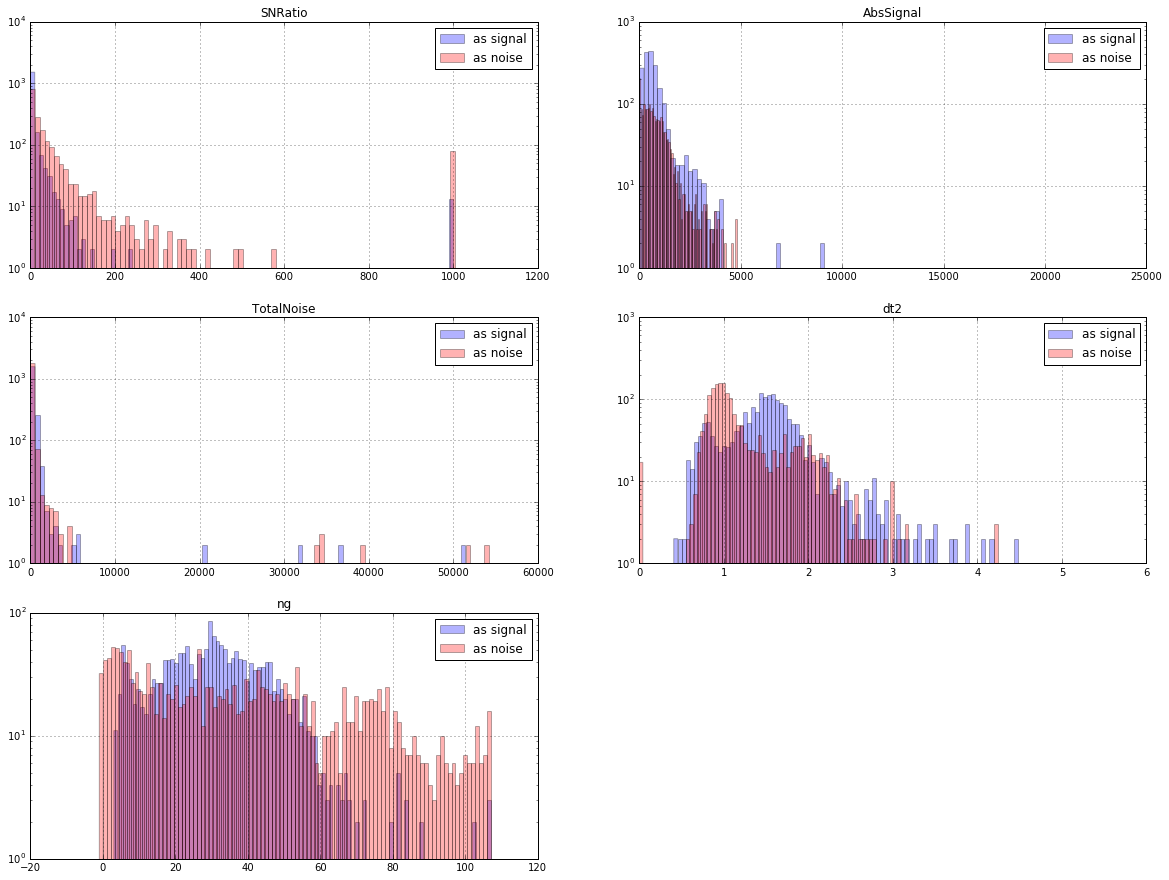

In [153]:
sparam=['SNRatio','AbsSignal','TotalNoise','dt2','ng'] 
plt.figure(figsize=(20,15))
#plt.figure(1)
for i in range(len(sparam)):
    plt.subplot(321+i)
    plt.hist(all[sparam[i]+'_s'], bins = 100, alpha = 0.3, color = 'b', label=r"as signal") #, normed=True
    plt.hist(all[sparam[i]+'_n'], bins = 100, alpha = 0.3, color = 'r', label=r"as noise")  #, normed=True
    plt.title(sparam[i])
    plt.legend(loc=1)
    plt.yscale('log')
    plt.grid()

In [119]:
all[:][all['AbsSignal_s']> 100000]

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
11048,30.78734,133382.3,4332.375,3,1.083849,2.0,12,0.0234,33.064,1413.01,0.816497,6


In [141]:
dima = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep='\s+')
eas = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS'] = int(1)
eas[:3]
alll=all.join(eas)
alll.fillna(0, inplace=True)
alll[:3]

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n,EAS
nev,,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32,1.0
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13,1.0
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25,0.0


In [143]:
eas = alll['EAS']
eas[:6]

nev
10675    1.0
10677    1.0
10679    0.0
10681    0.0
10683    0.0
10685    1.0
Name: EAS, dtype: float64

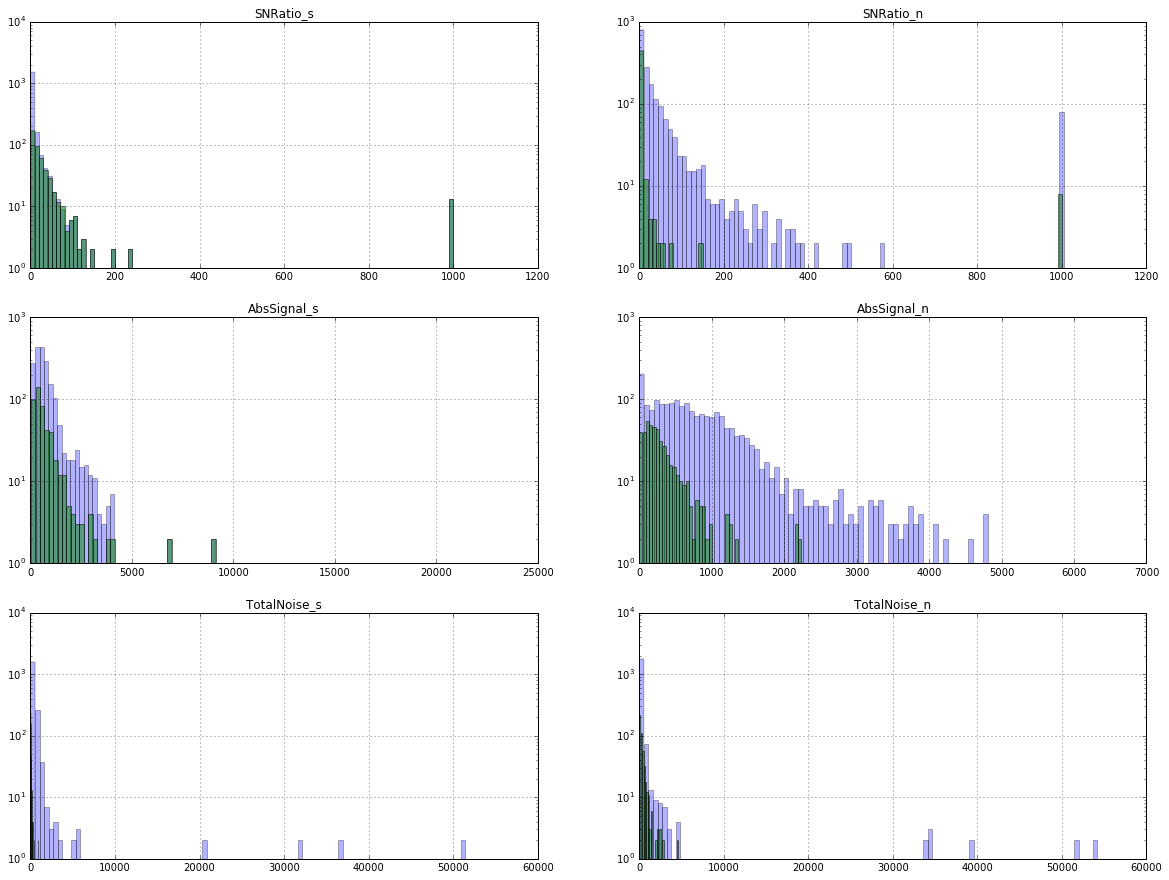

In [150]:
plt.figure(figsize=(20,15))
plt.figure(1)
for i in range(len(param)//2):
    plt.subplot(321+i)
    plt.hist(alll[param[i]],                 bins = 100, alpha = 0.3, color = 'b') #, normed=True)
    plt.hist(alll[param[i]][alll['EAS']==1], bins = 100, alpha = 0.5, color = 'g') #, normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

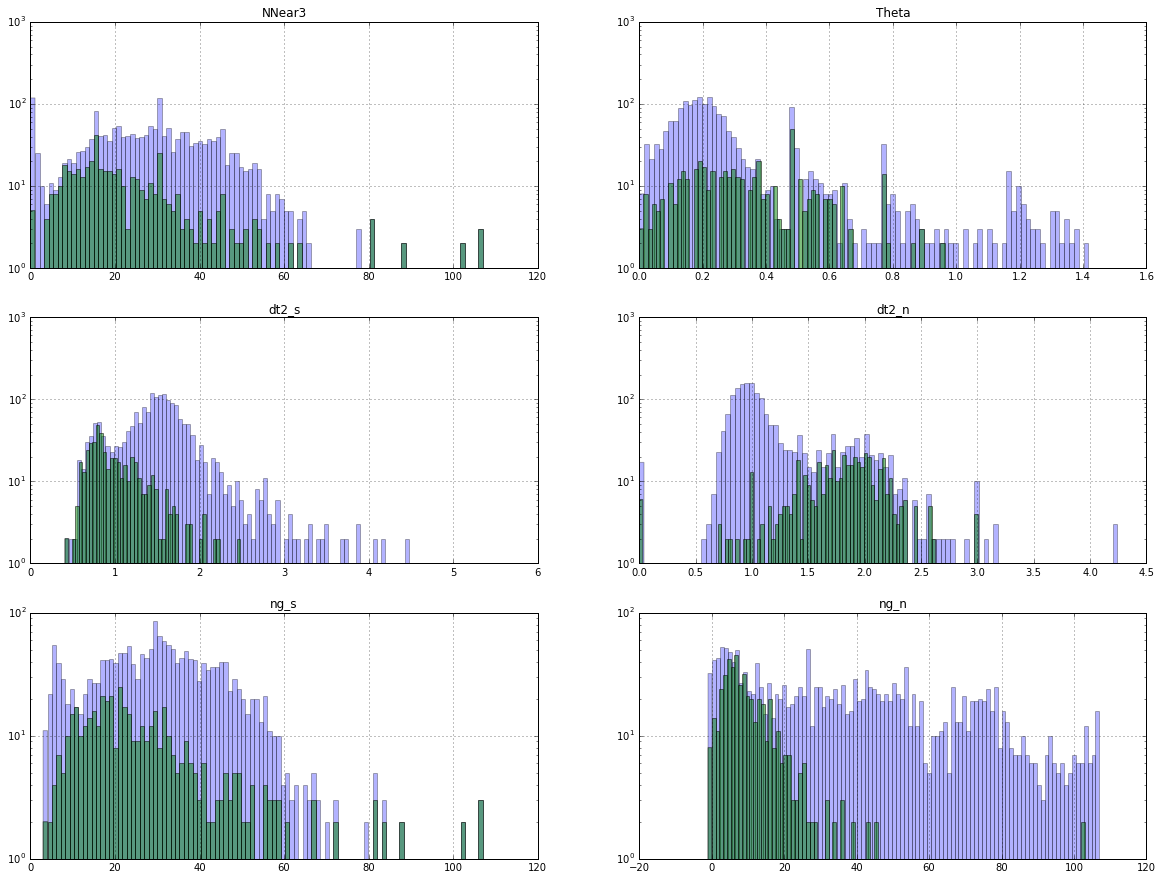

In [151]:
plt.figure(figsize=(20,15))
plt.figure(1)
for i in range(len(param)//2 , len(param)):
    plt.subplot(321+i-6)
    plt.hist(alll[param[i]],                 bins = 100, alpha = 0.3, color = 'b') #, normed=True)
    plt.hist(alll[param[i]][alll['EAS']==1], bins = 100, alpha = 0.5, color = 'g') #, normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

In [155]:
alll.corr()

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n,EAS
SNRatio_s,1.000000,0.066291,-0.032573,0.002322,0.028509,-0.145394,0.005954,-0.023948,-0.077249,-0.001718,0.174228,-0.155255,0.270948
AbsSignal_s,0.066291,1.000000,-0.009000,0.614217,-0.128931,-0.062005,0.615384,0.055884,0.635707,0.068323,-0.028472,0.292659,0.047473
TotalNoise_s,-0.032573,-0.009000,1.000000,0.092467,0.282399,0.176822,0.112147,-0.028426,-0.010138,0.956848,0.015908,0.070638,-0.094245
NNear3,0.002322,0.614217,0.092467,1.000000,-0.378068,-0.088394,0.993298,0.121364,0.631411,0.106885,-0.239951,0.723594,-0.121394
Theta,0.028509,-0.128931,0.282399,-0.378068,1.000000,0.535901,-0.338590,-0.153470,-0.416088,0.336510,0.381389,-0.519064,0.101413
dt2_s,-0.145394,-0.062005,0.176822,-0.088394,0.535901,1.000000,-0.064505,0.027361,0.056793,0.148604,-0.136642,0.136092,-0.496365
ng_s,0.005954,0.615384,0.112147,0.993298,-0.338590,-0.064505,1.000000,0.107448,0.611974,0.130951,-0.210060,0.704391,-0.106900
SNRatio_n,-0.023948,0.055884,-0.028426,0.121364,-0.153470,0.027361,0.107448,1.000000,0.208422,-0.054384,-0.173991,0.221176,-0.171756
AbsSignal_n,-0.077249,0.635707,-0.010138,0.631411,-0.416088,0.056793,0.611974,0.208422,1.000000,-0.066102,-0.350326,0.748309,-0.331230
TotalNoise_n,-0.001718,0.068323,0.956848,0.106885,0.336510,0.148604,0.130951,-0.054384,-0.066102,1.000000,0.081025,-0.011501,-0.016807


# Методы ML

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
four = alll[['EAS','dt2_s', 'dt2_n', 'ng_n', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3','Theta', 'ng_s']]
four.corr()

,EAS,dt2_s,dt2_n,ng_n,AbsSignal_n,SNRatio_s,SNRatio_n,NNear3,Theta,ng_s
EAS,1.000000,-0.496365,0.597348,-0.534300,-0.331230,0.270948,-0.171756,-0.121394,0.101413,-0.106900
dt2_s,-0.496365,1.000000,-0.136642,0.136092,0.056793,-0.145394,0.027361,-0.088394,0.535901,-0.064505
dt2_n,0.597348,-0.136642,1.000000,-0.518792,-0.350326,0.174228,-0.173991,-0.239951,0.381389,-0.210060
ng_n,-0.534300,0.136092,-0.518792,1.000000,0.748309,-0.155255,0.221176,0.723594,-0.519064,0.704391
AbsSignal_n,-0.331230,0.056793,-0.350326,0.748309,1.000000,-0.077249,0.208422,0.631411,-0.416088,0.611974
SNRatio_s,0.270948,-0.145394,0.174228,-0.155255,-0.077249,1.000000,-0.023948,0.002322,0.028509,0.005954
SNRatio_n,-0.171756,0.027361,-0.173991,0.221176,0.208422,-0.023948,1.000000,0.121364,-0.153470,0.107448
NNear3,-0.121394,-0.088394,-0.239951,0.723594,0.631411,0.002322,0.121364,1.000000,-0.378068,0.993298
Theta,0.101413,0.535901,0.381389,-0.519064,-0.416088,0.028509,-0.153470,-0.378068,1.000000,-0.338590
ng_s,-0.106900,-0.064505,-0.210060,0.704391,0.611974,0.005954,0.107448,0.993298,-0.338590,1.000000


In [163]:
X = alll[['dt2_s', 'dt2_n', 'ng_n', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3','Theta', 'ng_s']]
len(X)

1910

In [170]:
Y = alll['EAS']
len(Y)

1910

In [171]:
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [173]:
# Вычислим важности признаков и найдите два признака с наибольшей важностью. 
importances = clf.feature_importances_
print(importances)

[ 0.03798677  0.52696418  0.0674818   0.01171986  0.23402239  0.03211127
  0.06861208  0.01789673  0.00320491]
